In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


## 1. Frequency Tables:
- Generate a frequency table for the product category.

- Which are the top 5 most listed product categories?

In [12]:
category_counts = df['category'].value_counts()
print(category_counts)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [14]:
top_5_categories = category_counts.head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


## 2. Visualizations:
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

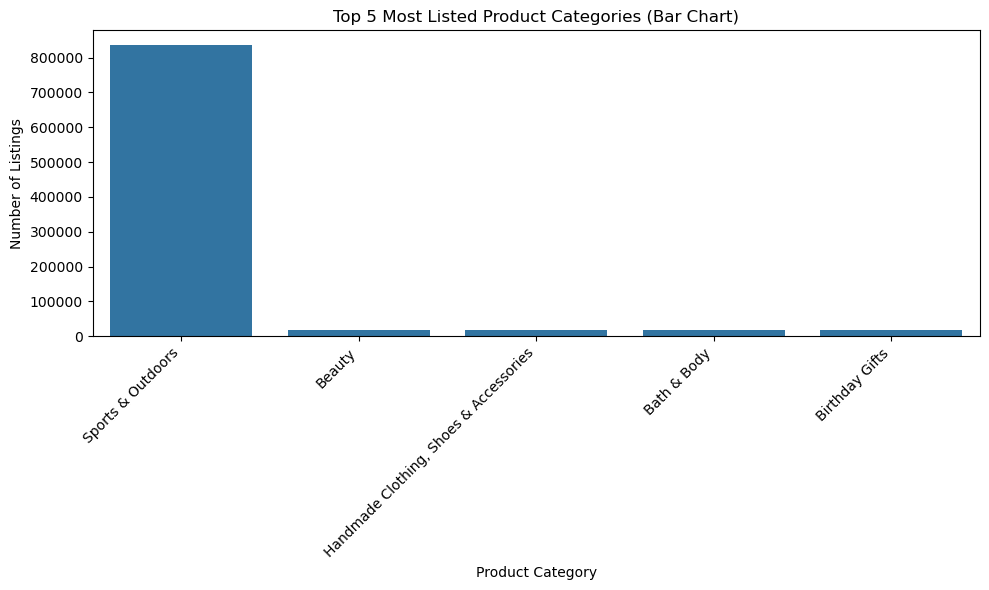

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.title('Top 5 Most Listed Product Categories (Bar Chart)')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_5_categories_bar_chart.png')
plt.show()

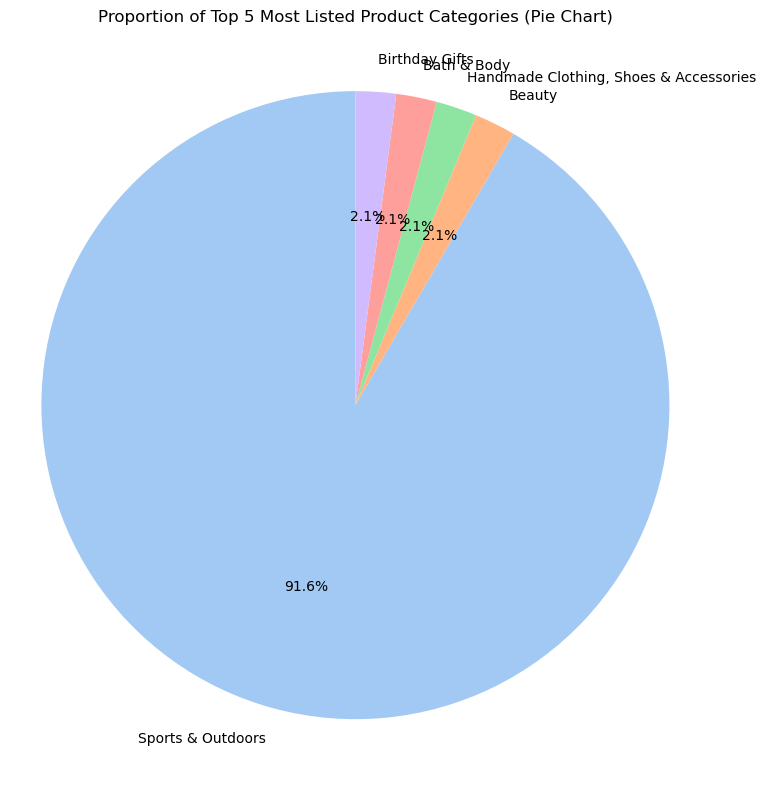

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_categories, 
    labels=top_5_categories.index, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=sns.color_palette("pastel")
)
plt.title('Proportion of Top 5 Most Listed Product Categories (Pie Chart)')
plt.axis('equal') 
plt.tight_layout()
plt.savefig('top_5_categories_pie_chart.png')
plt.show()

## Part 2: Delving into Product Pricing
1. Measures of Centrality:

    - Calculate the mean, median, and mode for the price of products.
   
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [35]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price:.2f}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99


The average product price is £89.24.

The middle price point, where 50% of the products are priced above and 50% are priced below, is £19.09.

The most frequently occurring price is £9.99.

This initial insight suggests we should use the median for a more reliable measure of a "typical" price, as the mean is heavily influenced by those high-priced outliers.

2. Measures of Dispersion:

    - Determine the variance, standard deviation, range, and interquartile range for product price.
   
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [36]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()

min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

print(f"Variance: {variance_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Minimum Price: {min_price:.2f}")
print(f"Maximum Price: {max_price:.2f}")
print(f"Range (Max - Min): {range_price:.2f}")
print(f"25th Percentile (Q1): {Q1:.2f}")
print(f"75th Percentile (Q3): {Q3:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Minimum Price: 0.00
Maximum Price: 100000.00
Range (Max - Min): 100000.00
25th Percentile (Q1): 9.99
75th Percentile (Q3): 45.99
Interquartile Range (IQR): 36.00


3. Visualizations:

    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
   
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

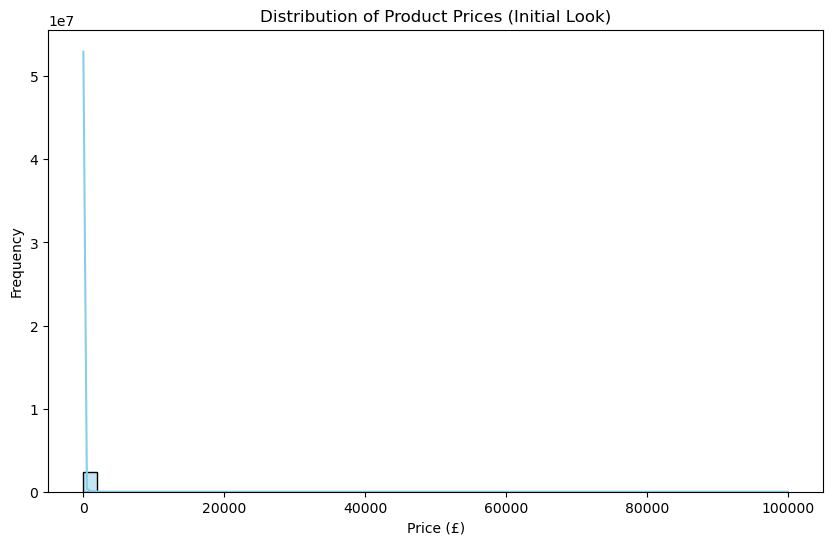

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Product Prices (Initial Look)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.savefig('price_histogram_initial.png')
plt.show()

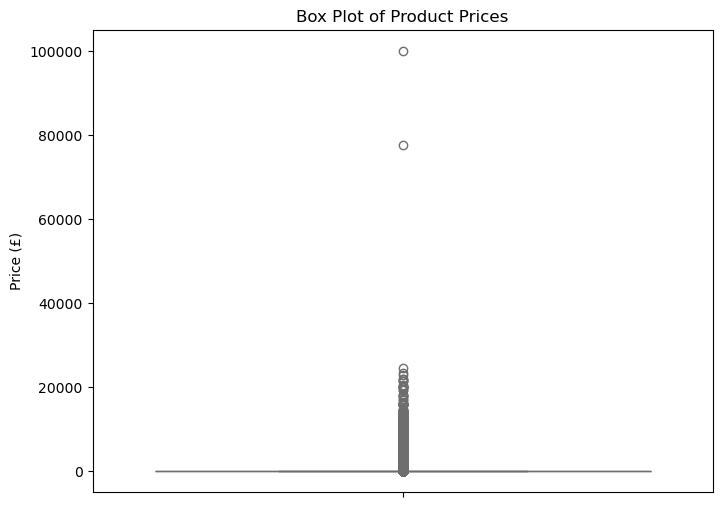

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'], color='lightcoral')
plt.title('Box Plot of Product Prices')
plt.ylabel('Price (£)')
plt.savefig('price_boxplot.png')
plt.show()

## 3: Unpacking Product Ratings
1. Measures of Centrality:

    - Calculate the mean, median, and mode for the rating of products.
   
    - How do customers generally rate products? Is there a common trend?

In [41]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()

mode_stars = df['stars'].mode()[0]

print(f"Mean Rating (stars): {mean_stars:.2f}")
print(f"Median Rating (stars): {median_stars:.2f}")
print(f"Mode Rating (stars): {mode_stars:.2f}")

Mean Rating (stars): 2.15
Median Rating (stars): 0.00
Mode Rating (stars): 0.00


Common Trend: The most common "rating" is actually unrated (0.00).

2. Measures of Dispersion:

    - Determine the variance, standard deviation, and interquartile range for product rating.
   
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [43]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
Q1_stars = df['stars'].quantile(0.25)
Q3_stars = df['stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars

print(f"Variance: {variance_stars:.2f}")
print(f"Standard Deviation: {std_dev_stars:.2f}")
print(f"25th Percentile (Q1): {Q1_stars:.2f}")
print(f"75th Percentile (Q3): {Q3_stars:.2f}")
print(f"Interquartile Range (IQR): {IQR_stars:.2f}")

Variance: 4.82
Standard Deviation: 2.19
25th Percentile (Q1): 0.00
75th Percentile (Q3): 4.40
Interquartile Range (IQR): 4.40


The dispersion measures confirm that product ratings are not consistent and are spread widely across the possible range.

In [44]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

print(f"Skewness: {skewness_stars:.2f}")
print(f"Kurtosis: {kurtosis_stars:.2f}")

Skewness: 0.08
Kurtosis: -1.93


The results indicate that the distribution is not strongly skewed, but the overall shape is flatter than a normal bell curve. As noted earlier, the dominance of 0.00 ratings is the primary driver of these shape statistics.

## 4: Visualizations:
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


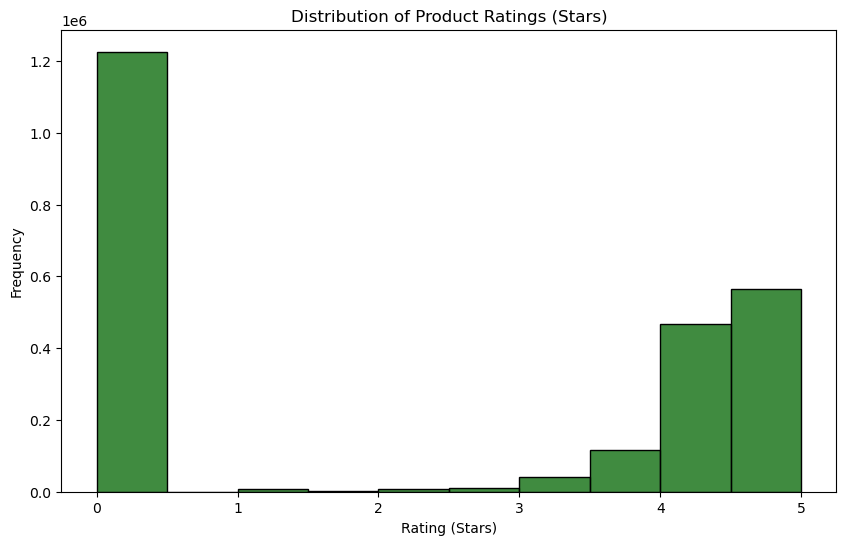

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=False, color='darkgreen')
plt.title('Distribution of Product Ratings (Stars)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.savefig('rating_stars_histogram.png')
plt.show()